# **THIS GROUP PROJECT IS DONE USING GOOGLE COLAB .**

 # **CAPSTONE PROJECT 2**


 ### **DOMAIN: Semiconductor manufacturing process**


• **CONTEXT:** A complex modern semiconductor manufacturing process is normally
under constant surveillance via the monitoring of signals variables collected from
sensors and or process measurement points. However, not all of these signals are
equally valuable in a specific monitoring system. The measured signals contain a
combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are required. If we consider each
type of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an
increase in process throughput, decreased time to learning and reduce the per unit
production costs. These signals can be used as features to predict the yield type. And by
analysing and trying out different combinations of features, essential signals that are
impacting the yield type can be identified.



•**DATA DESCRIPTION: sensor-data.csv : (1567, 592)**


The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each
example represents a single production entity with associated measured features and
the labels represent a simple pass/fail yield for in house line testing. Target column “ –1”
corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that
specific test point.


**• PROJECT OBJECTIVE**:


 We will build a classifier to predict the Pass/Fail yield of a
particular process entity and analyse whether all the features are required to build the
model or not.

# **STEP 1: IMPORT AND EXPLORE THE DATA.**

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
# Import necessary libraries
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score

**LOADING THE DATASET**

In [ ]:

# Load the dataset
file_path = '/content/signal-data.csv'
sensor_data = pd.read_csv(file_path)

**DISPLAYING THE FIRST FIVE ROWS OF THE DATA**

In [ ]:
# Display the first few rows of the dataframe
sensor_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


**SHAPE OF THE DATA**

In [ ]:
print('data have', sensor_data.shape[0],'rows and ',sensor_data.shape[1],'columns')

data have 1567 rows and  592 columns


**BASIC INFO OF DATA**

In [ ]:
# Display basic information about the dataframe
sensor_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


**STATISTICAL SUMMARY**

In [ ]:
# Display summary statistics of the dataframe
sensor_data.describe()



,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**MISSING VALUES INTERPRETATION**

In [ ]:
# Check for missing values
missing_values = sensor_data.isnull().sum()
print('Total Missing Vlaues in the dataset :',missing_values.sum())
print("Missing values per column:")
missing_columns=missing_values[missing_values > 0]

missing_columns

Total Missing Vlaues in the dataset : 41951
Missing values per column:


,0
0,6
1,7
2,14
3,14
4,14
5,14
6,14
7,9
8,2
9,2


**CHECKING THE VALU ECOUNTS OF TARGET VARIABLE**

In [ ]:
# Check the distribution of the target variable
sensor_data['Pass/Fail'].value_counts()



,count
Pass/Fail,
-1,1463
1,104


**CHECKING FOR DUPLICATE ROWS**

In [ ]:
# Check for duplicate rows
duplicate_rows = sensor_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## **INFERENCE FROM STEP 1 :**

* Basic Structure of the Data:

  The dataset contains 1567 rows and 592 columns.
The first column is a timestamp, and the last column is the target variable (Pass/Fail).

* Data Types:

  Most of the columns are numeric, with the exception of the timestamp column.

* Total Missing Vlaues in the dataset : 41951

* CLASS IMBALANCE in the target variable is present

* As there are so many features , we need to perform the feature engineering

* There are no duplicate values in the dataset.

# **STEP 2: DATA CLEANSING :**


• Missing value treatment.

• Drop attribute/s if required using relevant functional knowledge.

• Make all relevant modifications on the data using both functional/logical
reasoning/assumptions.

In [ ]:



# Drop columns with more than 70% missing values
threshold = len(sensor_data) * 0.7
columns_to_drop = missing_columns[missing_columns > threshold].index
sensor_data_cleaned = sensor_data.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

# Fill missing values in remaining columns with zero
sensor_data_cleaned = sensor_data_cleaned.fillna(0)

# Verify that there are no missing values
print("Missing values after cleaning:")
print(sensor_data_cleaned.isnull().sum().sum())

# Drop irrelevant columns based on functional knowledge
# Assuming 'Time' column is irrelevant for the prediction task
sensor_data_cleaned = sensor_data_cleaned.drop(columns=['Time'])



# Save the cleaned data for further use
sensor_data_cleaned.to_csv('/content/sensor_data_cleaned.csv', index=False)


sensor_data_cleaned.head()

Dropped columns: Index(['85', '157', '158', '220', '292', '293', '358', '492'], dtype='object')
Missing values after cleaning:
0


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


**INFERENCE FROM STEP 2:**

* 8  columns dropped  with higher than 70% missing values .

* Imputed missing values with zero representing no signal .

* Dropped the Time column .

# **STEP 3: Data analysis & visualisation:**


• Perform detailed relevant statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate
detailed comments after each analysis.

### **UNIVARIATE ANALYSIS**

**Distribution of Target Variable:**


        The count plot shows the distribution of the Pass/Fail target variable.
        We can see -1 counta are far larger than 1 count .

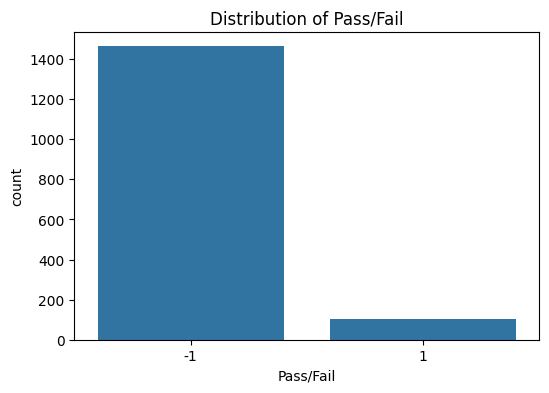

In [ ]:

# Univariate Analysis
# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Pass/Fail', data=sensor_data_cleaned)
plt.title('Distribution of Pass/Fail')
plt.show()

**STATISTICAL SUMMARY :**  
* We can observe some columns have large range while most of the columns have small range of values.



In [ ]:


# Summary statistics of numerical features
summary_stats = sensor_data_cleaned.describe()
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,99.106573,100.209538,0.121122,1.460995,-0.000840,...,38.623767,0.499777,0.015308,0.003844,3.065869,0.021445,0.016464,0.005280,99.606461,-0.867262
std,200.204648,184.815753,209.206773,458.937272,56.104457,9.412812,11.363940,0.012831,0.090461,0.015107,...,72.871466,0.013084,0.017179,0.003721,3.577730,0.012366,0.008815,0.002869,93.895701,0.498010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016900,0.000000,0.000000,0.000000,-1.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,100.000000,97.762200,0.121100,1.410950,-0.010800,...,0.000000,0.497900,0.011600,0.003100,2.306200,0.013400,0.010600,0.003300,44.368600,-1.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,100.000000,101.492200,0.122400,1.461500,-0.001300,...,0.000000,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.000000,104.530000,0.123800,1.516850,0.008400,...,57.449750,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.000000,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**DISTRIBUTION PLOTS :**

Feature '0':

The distribution plot for feature '0' shows a roughly normal distribution with some skewness.



Feature '1'

shows a distribution with a noticeable peak, indicating a concentration of values around a specific range.
There may be some outliers or extreme values, as indicated by the long tails of the distribution.


Feature '2':

shows a somewhat uniform distribution, with values spread more evenly across the range.




Feature '3':



 shows a roughly normal distribution with some skewness.
The KDE line indicates the central tendency and spread of the values, with a peak around a certain range.

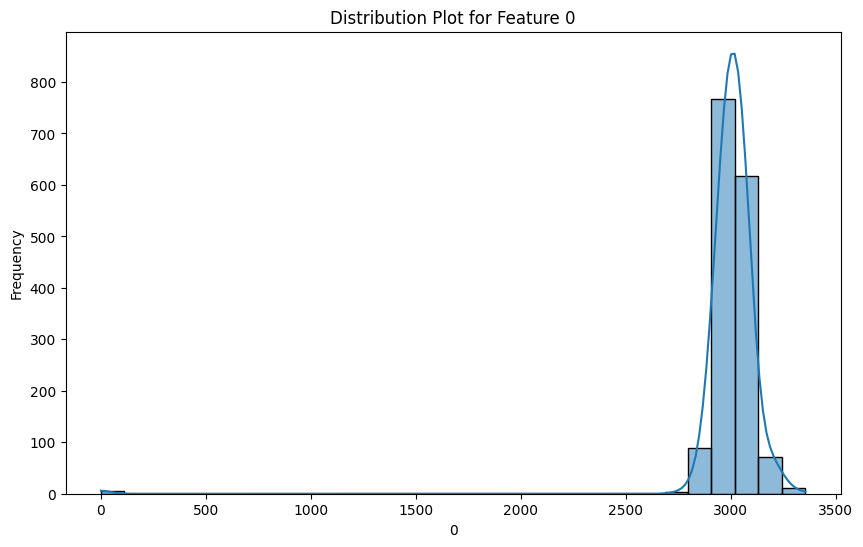

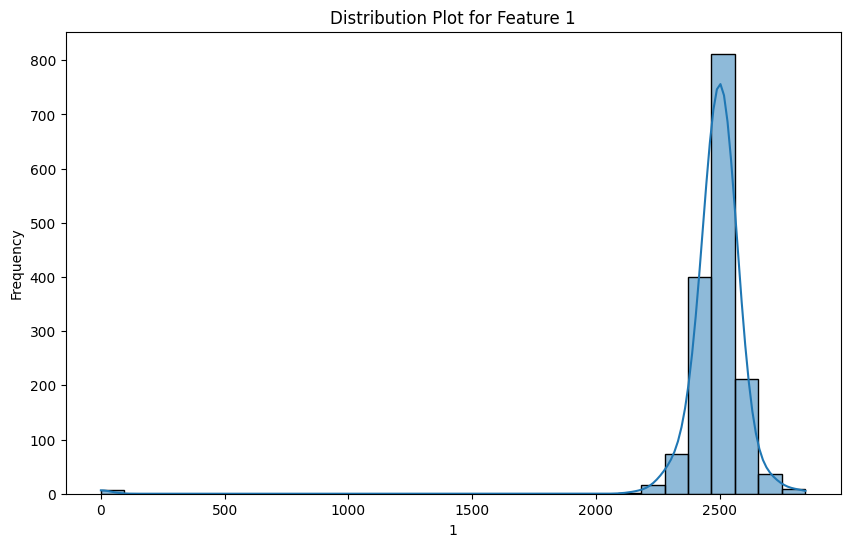

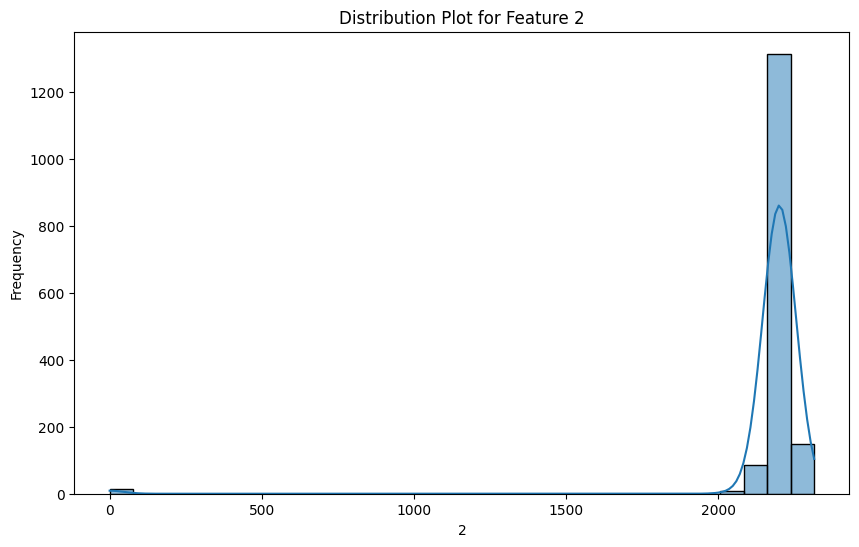

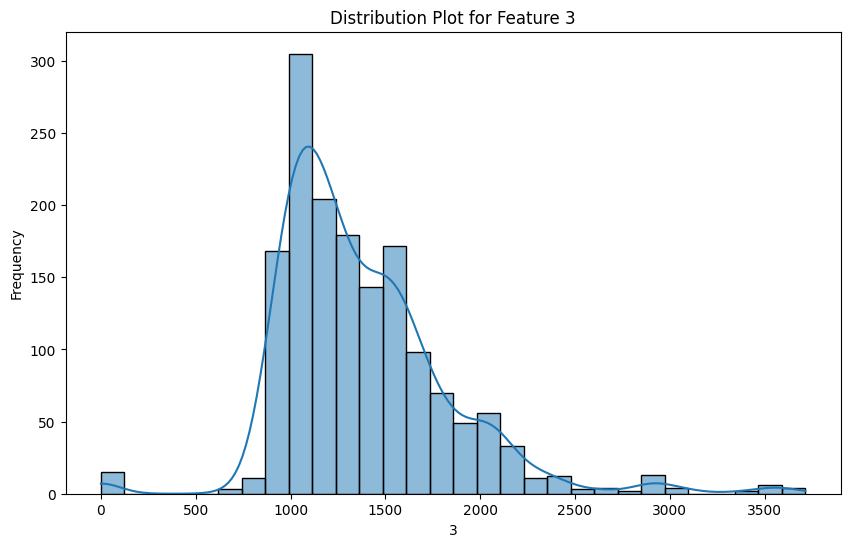

In [ ]:
selected_features = ['0', '1', '2', '3']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(sensor_data_cleaned[feature], kde=True, bins=30)
    plt.title(f'Distribution Plot for Feature {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

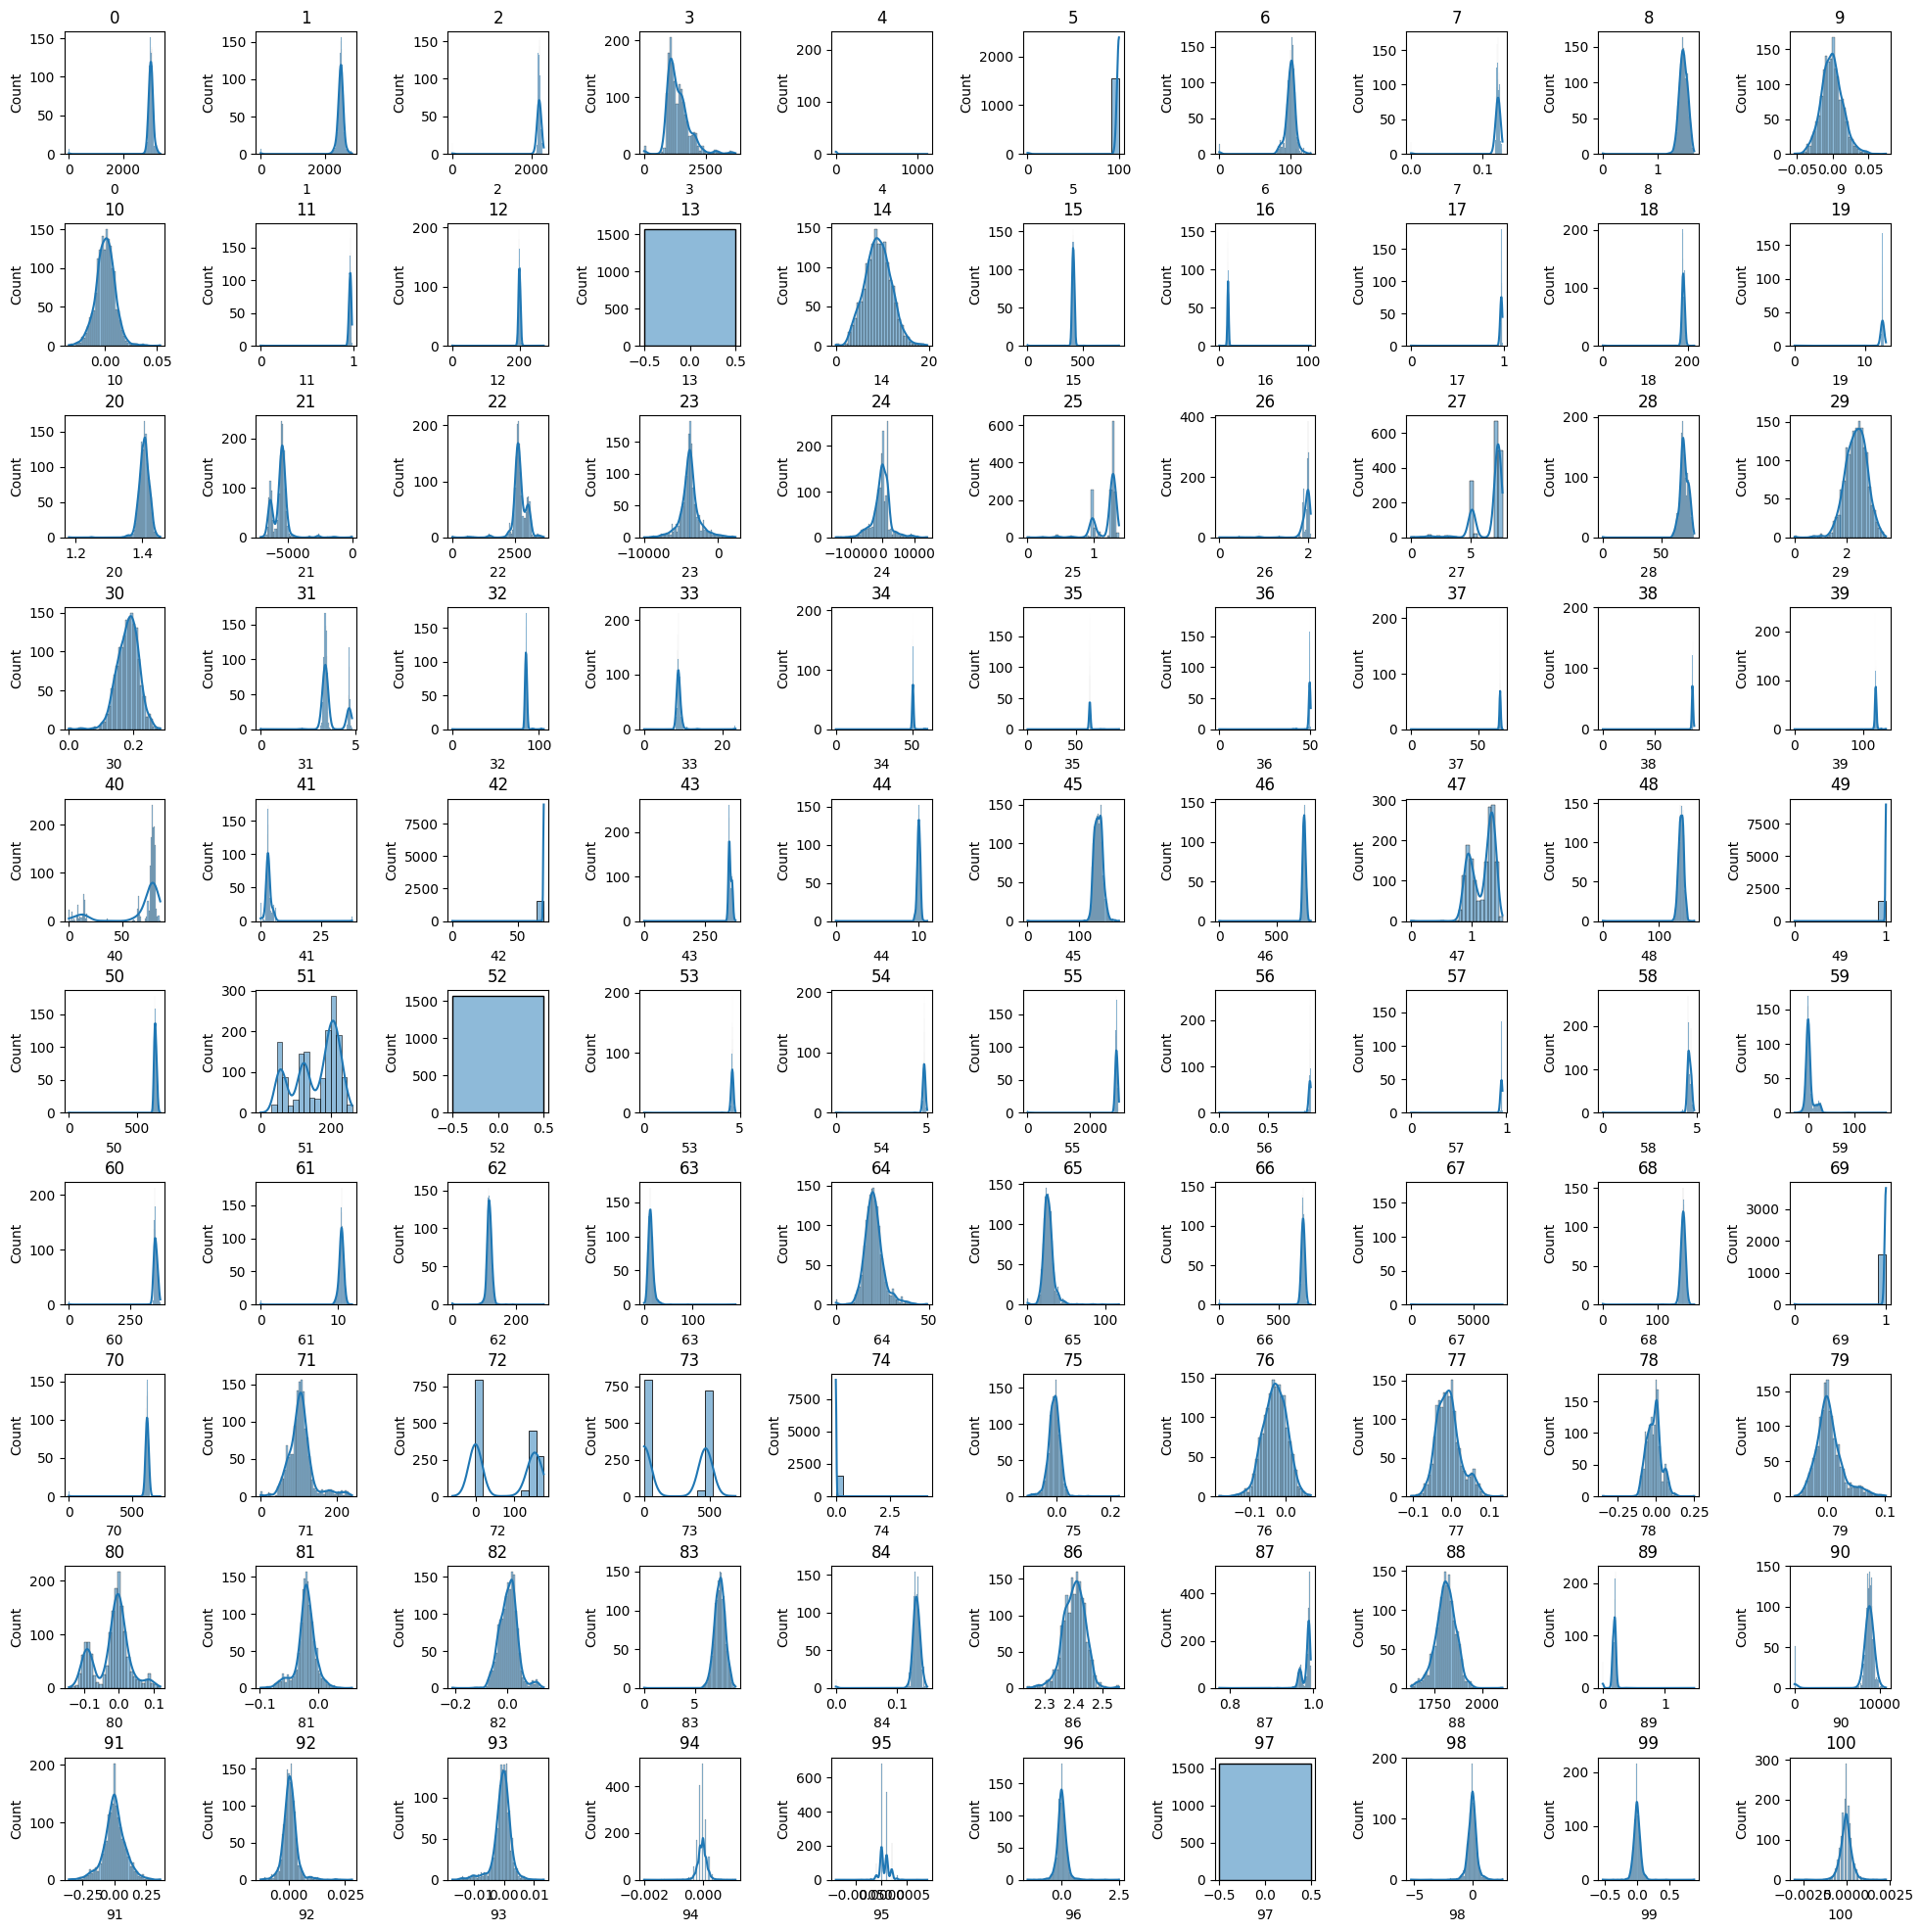

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sensor_data_cleaned is your dataframe
# Selecting the first 100 features
data_subset = sensor_data_cleaned.iloc[:, :100]

# Setting up the 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
fig.tight_layout(pad=3.0)

# Plotting the distribution of each feature
for i, ax in enumerate(axes.flat):
    if i < data_subset.shape[1]:  # Check if there are enough columns
        sns.histplot(data_subset.iloc[:, i], ax=ax, kde=True)
        ax.set_title(data_subset.columns[i])
    else:
        ax.axis('off')  # Turn off the axes if there are no more columns to plot

plt.show()


## **BIVARIATE ANALYSIS**

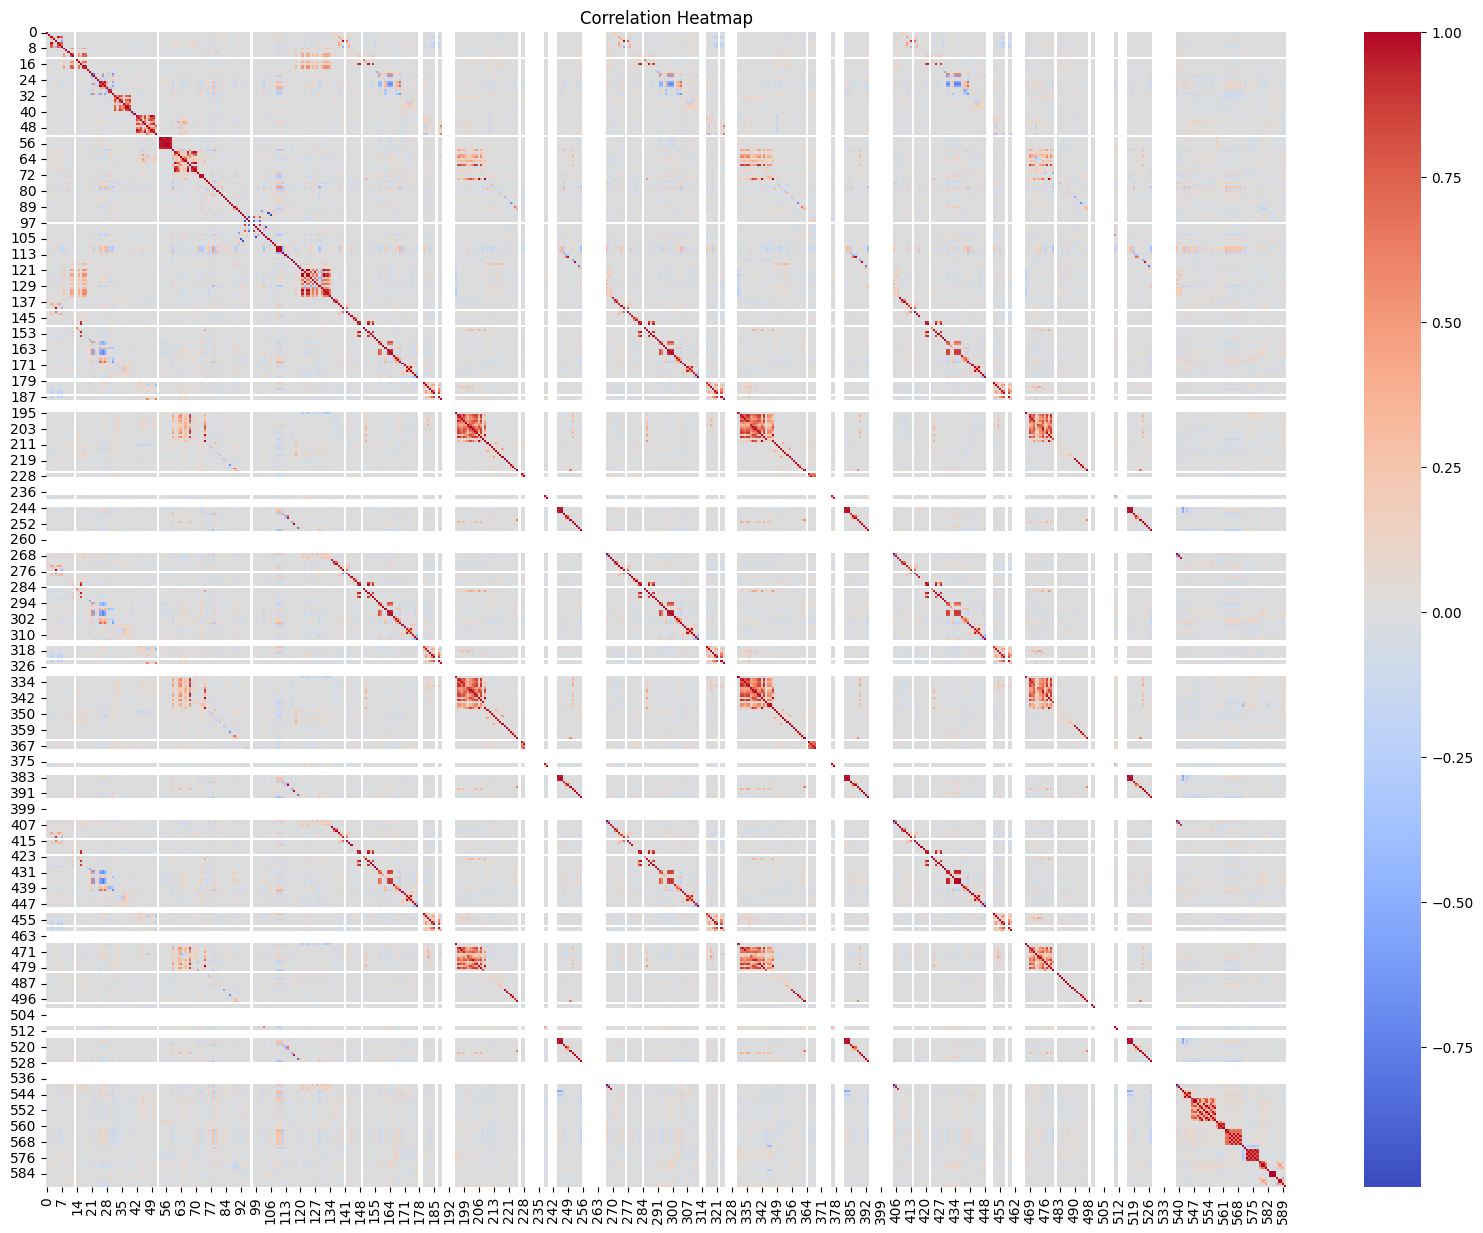

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
correlation_matrix = sensor_data_cleaned.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

INFERENCE FROM HEATMAP:


There are distinct clusters of highly correlated features. These clusters appear as blocks along the diagonal of the heatmap.


Features within these clusters are highly correlated with each other, which could indicate redundancy. Redundant features do not add additional information and can be removed or combined.

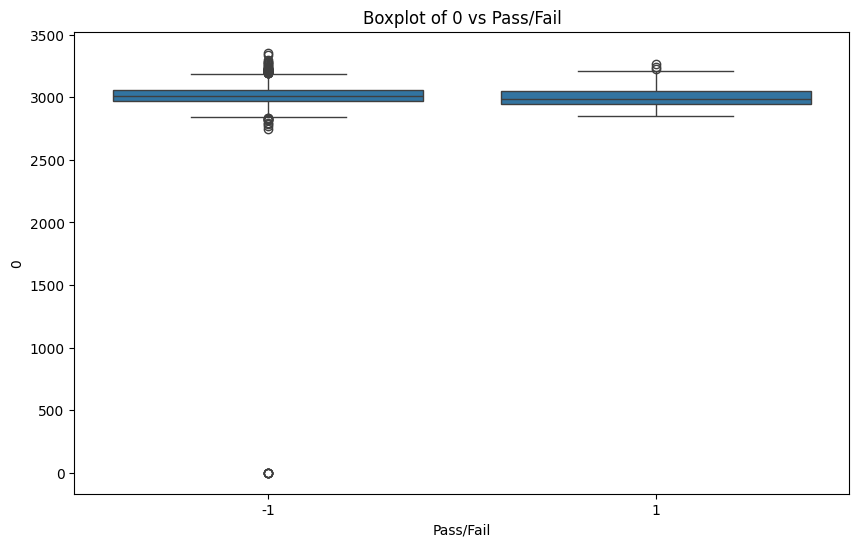

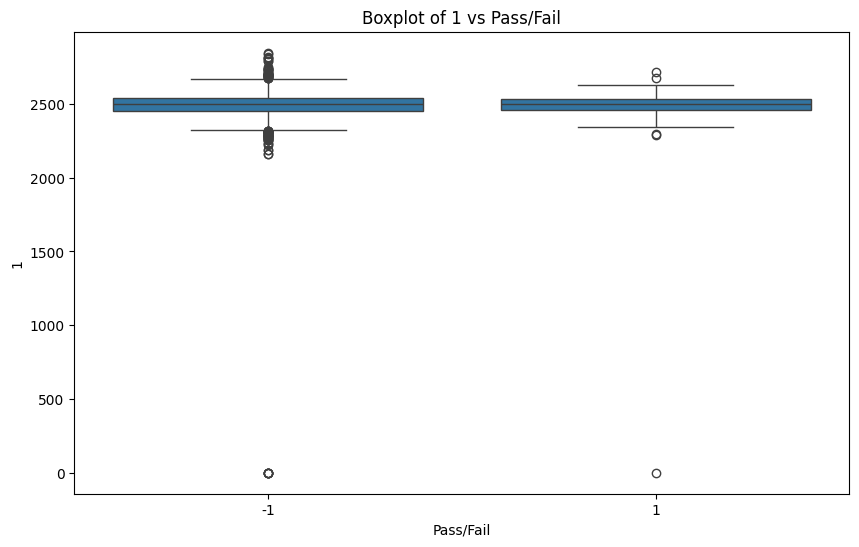

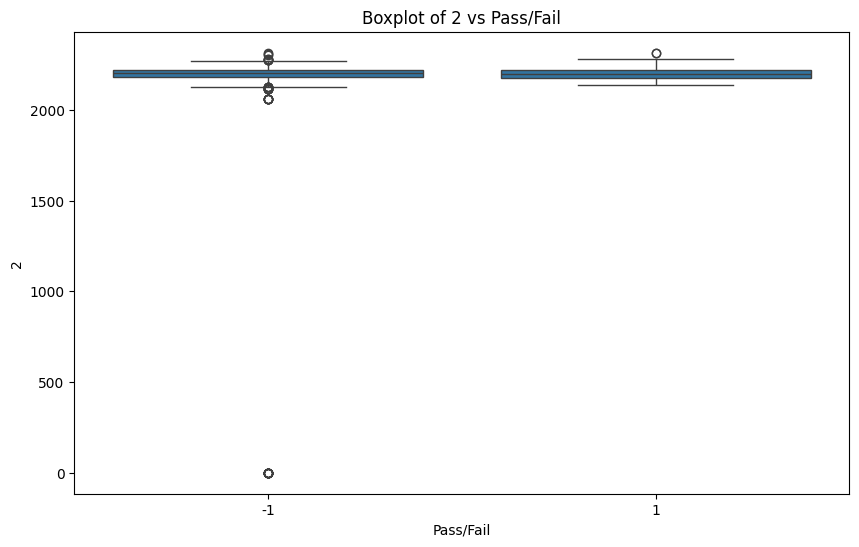

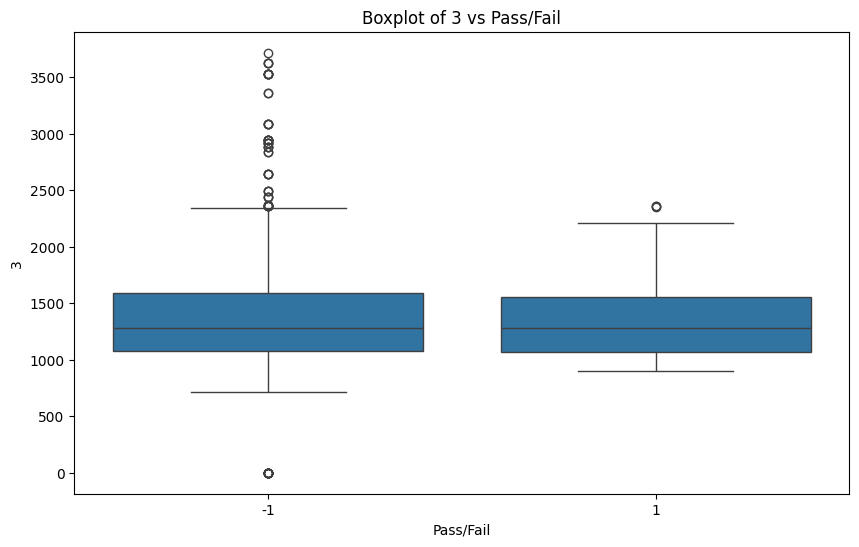

In [ ]:

# Boxplot of a few selected features vs target
selected_features = ['0', '1', '2', '3']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pass/Fail', y=feature, data=sensor_data_cleaned)
    plt.title(f'Boxplot of {feature} vs Pass/Fail')
    plt.show()

INFERENCE FROM BOXPLOTS :    

* Features '0', '1', and '2' show very similar distributions for both 'Pass' and 'Fail' classes, indicating these features might not be highly informative for classification purposes.


* Feature '3' shows a more distinct difference between the 'Pass' and 'Fail' classes, suggesting it may be a more informative feature for predicting the target variable.

* Each feature contains outliers, with some extreme values close to zero. These outliers might need further investigation to understand their impact on the model performance.

## MULTIVARIATE ANALYSIS

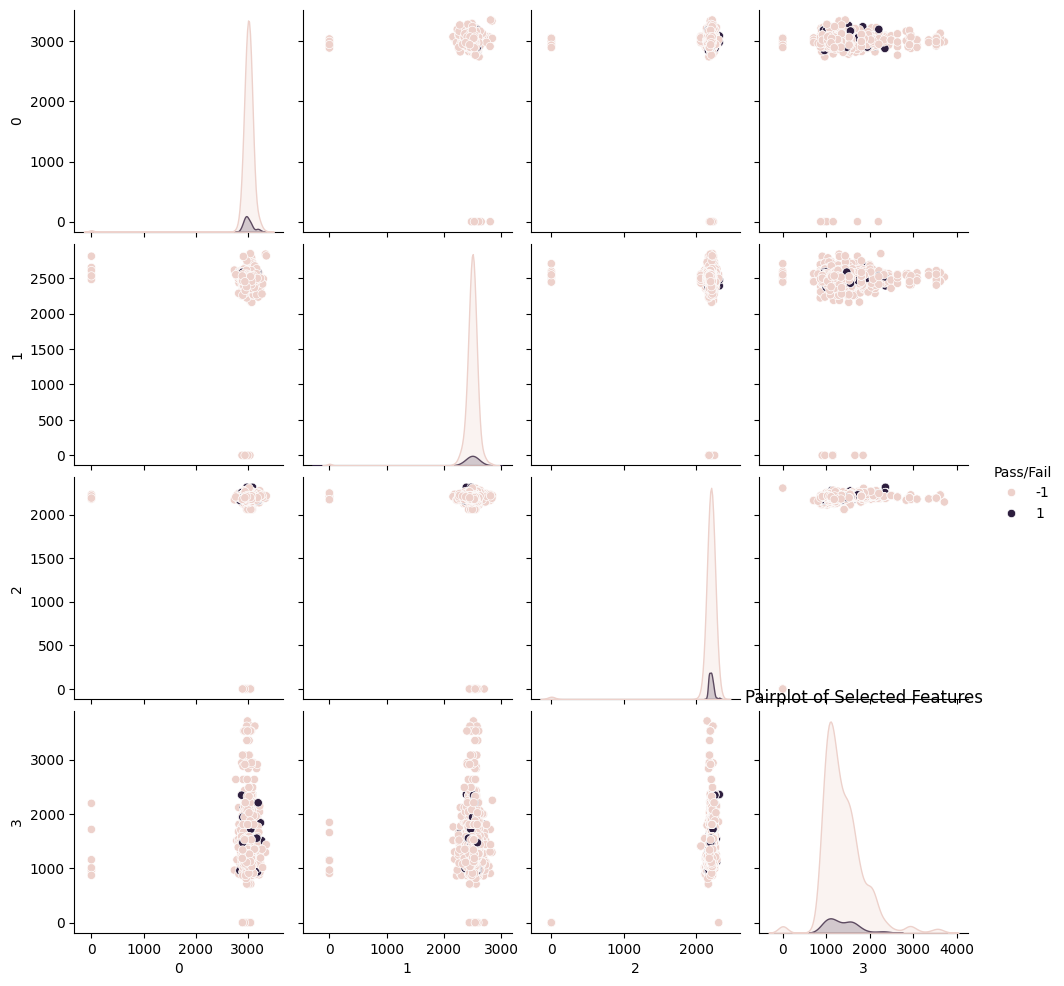

In [ ]:
# Pairplot of selected features
selected_features.append('Pass/Fail')
sns.pairplot(sensor_data_cleaned[selected_features], hue='Pass/Fail')
plt.title('Pairplot of Selected Features')
plt.show()

INFERENCE FROM PAIRPLOT :          

* Features '0', '1', and '2' have a sharp peak at high values and a long tail towards zero, indicating skewed distributions.


* Feature '3' has a more spread-out distribution compared to the other features

* Most of the Pass and Fail classes overlap significantly for Features '0', '1', and '2', indicating these features may not provide strong class separation.


* Feature '3' shows some separation between Pass and Fail classes, but there is still considerable overlap.

In [ ]:
# Principal Component Analysis (PCA) for dimensionality reduction and visualization
from sklearn.decomposition import PCA

# Standardizing the data
from sklearn.preprocessing import StandardScaler
features = sensor_data_cleaned.drop(columns=['Pass/Fail']).columns
x = sensor_data_cleaned.loc[:, features].values
y = sensor_data_cleaned.loc[:, ['Pass/Fail']].values
x = StandardScaler().fit_transform(x)

# PCA projection to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, sensor_data_cleaned[['Pass/Fail']]], axis=1)

In [ ]:
final_df.head()

,PC1,PC2,Pass/Fail
0,-1.430236,4.396098,-1
1,-1.975628,2.525086,-1
2,0.258583,1.673698,1
3,0.429730,1.823703,-1
4,0.349103,4.019596,-1


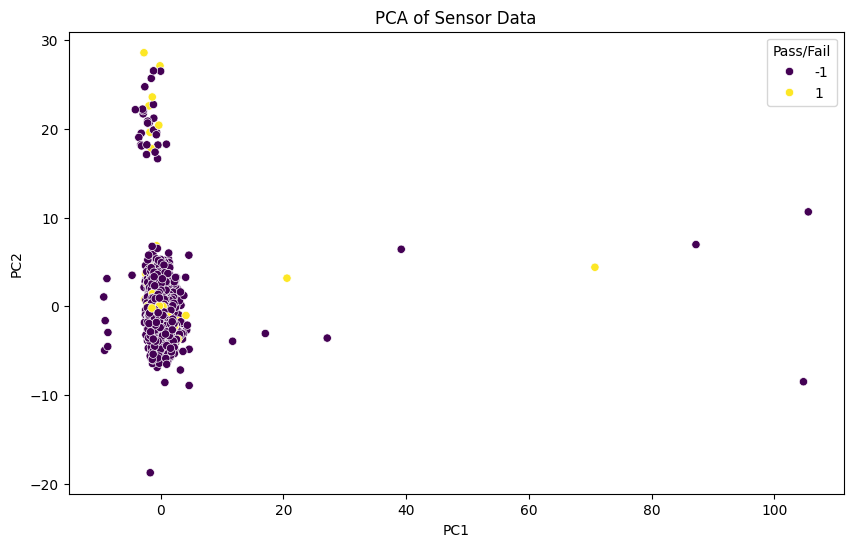

In [ ]:





# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Pass/Fail', data=final_df, palette='viridis')
plt.title('PCA of Sensor Data')
plt.show()

INFERENCE FROM  PCA :      

* The spread of points along the PC1 and PC2 axes indicates the amount of variance captured by these principal components

* Some points are located far from the main clusters, representing potential outliers.

* Most of the data points form dense clusters around the origin, indicating that the majority of the variance is concentrated in this region.

* There is some overlap between the classes, but certain regions show better separation, particularly along the PC2 axis.






# **STEP 4 :Data pre-processing:**

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced (read SMOTE)

• Perform train-test split and standardise the data or vice versa if required.

• Check if the train and test data have similar statistical characteristics when compared
with original data.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns



# Segregate predictors and target attributes
X = sensor_data_cleaned.drop(columns=['Pass/Fail'])
y = sensor_data_cleaned['Pass/Fail']

# Check for target balancing
print("Target distribution before balancing:")
y.value_counts()

Target distribution before balancing:


,count
Pass/Fail,
-1,1463
1,104


In [ ]:
# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check target distribution after applying SMOTE
print("Target distribution after balancing:")
y_balanced.value_counts()

Target distribution after balancing:


,count
Pass/Fail,
-1,1463
1,1463


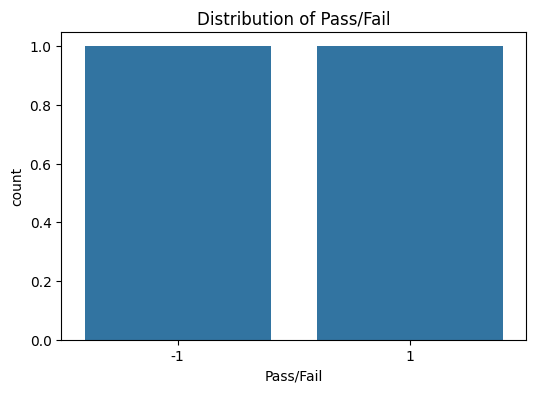

In [ ]:
# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(y_balanced.value_counts())
plt.title('Distribution of Pass/Fail')
plt.show()

INFERENCE :

WE CAN SEE THE BALNCE BETWEEN THE -1 AND 1 VALUES .

#**STEP 5 : Model training ,testing and tuning**:

FILTERING THE WARNINGS WHILE RUNNING THE MODELS

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


GRADIENT BOOST ALGORITHM ONLY EXPECTS 0 OR 1 IN TARGET VARIABLE. SO REPLACING -1 WITH 0 .

In [ ]:
# Replace -1 with 0 in y_balanced
y_balanced = y_balanced.replace(-1, 0)

APPLYING PCA TO INPUT FEATURES AND SELECTING 95% VARIANCE FROM THE FEATURES

In [ ]:




# Perform PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_balanced)

# Check the number of components selected
print(f"Number of components selected: {pca.n_components_}")





Number of components selected: 6


SEGREGATING INPUT FEATURE DATA INTO TRAINING AND TESTING SESTS

In [ ]:
# Perform train-test split on the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_balanced, test_size=0.2, random_state=42)

FUNCTION TO TRAIN AND EVALUATE ALL MODELS

In [ ]:


# Function to train and evaluate a model
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    print(f"Best Parameters: {grid_search.best_params_}")
    print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))

    return best_model, accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

## **BUILDING RANDOMFOREST CLASSIFIER**

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


print("Random Forest Classifier:")
best_rf_model, rf_train_acc, rf_test_acc = train_and_evaluate_model(rf_model, rf_param_grid, X_train_pca, y_train, X_test_pca, y_test)

Random Forest Classifier:
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training Accuracy:  1.0
Test Accuracy:  0.8856655290102389
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       306
           1       0.86      0.91      0.88       280

    accuracy                           0.89       586
   macro avg       0.89      0.89      0.89       586
weighted avg       0.89      0.89      0.89       586



INFERENCE FROM THE RANDOM FOREST MODEL CLASSIFICATION REPORT :          

1. The RANDOM FOREST model achieved an accuracy of approximately**88.57%**, indicating a high overall performance.
2. Precision and recall are well-balanced for both classes, with **class 0** having precision of **0.91** and recall of **0.86**, and **class 1** having precision of **0.86** and recall of **0.91**.
3. The F1 scores for both classes are high (0.89 for class 0 and 0.88 for class 1), showing a good balance between precision and recall.
4. Macro and weighted averages for precision, recall, and F1-score are all 0.89, demonstrating consistent performance across classes.
5. The dataset is fairly balanced with 306 samples in class 0 and 280 samples in class 1, contributing to the model's balanced performance.

 ## **BUILDING XGBOOST CLASSIFIER**

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


print("\nXGBoost Classifier:")
best_xgb_model, xgb_train_acc, xgb_test_acc = train_and_evaluate_model(xgb_model, xgb_param_grid, X_train_pca, y_train, X_test_pca, y_test)


XGBoost Classifier:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.6}
Training Accuracy:  1.0
Test Accuracy:  0.8771331058020477
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       306
           1       0.83      0.93      0.88       280

    accuracy                           0.88       586
   macro avg       0.88      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586



INFERENCE FROM THE XGBOOST MODEL CLASSIFICATION REPORT:

1. The XGBoost model achieved an accuracy of approximately **87.71%**, indicating a high overall performance.
2. Precision and recall are well-balanced for both classes, with **class 0** having precision of **0.93** and recall of **0.83**, and **class 1** having precision of **0.83** and recall of **0.93**.
3. The F1 scores for both classes are high (**0.88** for **class 0** and **0.88** for **class 1**), showing a good balance between precision and recall.
4. Macro and weighted averages for precision, recall, and F1-score are all **0.88**, demonstrating consistent performance across classes.
5. The dataset is fairly balanced with **306** samples in **class 0** and **280** samples in **class 1**, contributing to the model's balanced performance.

## **BUILDING NAIVE BAYES CLASSIFIER**

In [ ]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}


print("\nNaive Bayes Classifier:")
best_nb_model, nb_train_acc, nb_test_acc = train_and_evaluate_model(nb_model, nb_param_grid, X_train_pca, y_train, X_test_pca, y_test)


Naive Bayes Classifier:
Best Parameters: {'var_smoothing': 0.0001}
Training Accuracy:  0.5935897435897436
Test Accuracy:  0.5614334470989761
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.28      0.40       306
           1       0.52      0.86      0.65       280

    accuracy                           0.56       586
   macro avg       0.61      0.57      0.53       586
weighted avg       0.61      0.56      0.52       586



INFERENCE FROM THE NAIVE BAYES MODEL CLASSIFICATION REPORT:

1. The Naive Bayes model achieved an accuracy of approximately **56.14%**, indicating a low overall performance.
2. Precision and recall are imbalanced for both classes, with **class 0** having a precision of **0.70** and a recall of **0.28**, and **class 1** having a precision of **0.52** and a recall of **0.86**.
3. The F1 scores for the classes are significantly different (**0.40** for **class 0** and **0.65** for **class 1**), showing a poor balance between precision and recall for class 0.
4. Macro and weighted averages for precision, recall, and F1-score are lower (**macro avg: 0.61 precision, 0.57 recall, 0.53 F1-score; weighted avg: 0.61 precision, 0.56 recall, 0.52 F1-score**), indicating overall poor performance and inconsistency across classes.
5. The dataset is fairly balanced with **306** samples in **class 0** and **280** samples in **class 1**, but the model struggles to accurately classify both classes effectively.

## **BUILDING LOGISTIC REGRESSION CLASSIFIER**

In [ ]:

# Logistic Regression Classifier
lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}


print("\nLogistic Regression Classifier:")
best_lr_model, lr_train_acc, lr_test_acc = train_and_evaluate_model(lr_model, lr_param_grid, X_train_pca, y_train, X_test_pca, y_test)


Logistic Regression Classifier:
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy:  0.5598290598290598
Test Accuracy:  0.5699658703071673
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.58       306
           1       0.55      0.58      0.56       280

    accuracy                           0.57       586
   macro avg       0.57      0.57      0.57       586
weighted avg       0.57      0.57      0.57       586



INFERENCE FROM THE LOGISTIC REGRESSION MODEL CLASSIFICATION REPORT:

1. The Logistic Regression model achieved an accuracy of approximately **56.99%**, indicating a low overall performance.
2. Precision and recall are relatively balanced but low for both classes, with **class 0** having a precision of **0.59** and a recall of **0.56**, and **class 1** having a precision of **0.55** and a recall of **0.58**.
3. The F1 scores for both classes are moderate (**0.58** for **class 0** and **0.56** for **class 1**), indicating a reasonable but not optimal balance between precision and recall.
4. Macro and weighted averages for precision, recall, and F1-score are consistent at **0.57**, showing uniform but underwhelming performance across classes.
5. The dataset is fairly balanced with **306** samples in **class 0** and **280** samples in **class 1**, but the model struggles to classify both classes accurately, resulting in moderate precision, recall, and F1 scores.

## **BUILDING K-NEAREST NEIGHBORS CLASSIFIER**

In [ ]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


print("\nK-Nearest Neighbors Classifier:")
best_knn_model, knn_train_acc, knn_test_acc = train_and_evaluate_model(knn_model, knn_param_grid, X_train_pca, y_train, X_test_pca, y_test)


K-Nearest Neighbors Classifier:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Training Accuracy:  1.0
Test Accuracy:  0.8378839590443686
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       306
           1       0.76      0.96      0.85       280

    accuracy                           0.84       586
   macro avg       0.86      0.84      0.84       586
weighted avg       0.86      0.84      0.84       586



INFERENCE FROM THE K-NEAREST NEIGHBORS MODEL CLASSIFICATION REPORT:

1. The K-Nearest Neighbors model achieved an accuracy of approximately **83.79%**, indicating a strong overall performance.
2. Precision and recall are well-balanced for both classes, with **class 0** having a precision of **0.95** and a recall of **0.73**, and **class 1** having a precision of **0.76** and a recall of **0.96**.
3. The F1 scores for both classes are high (**0.82** for **class 0** and **0.85** for **class 1**), showing a good balance between precision and recall.
4. Macro and weighted averages for precision, recall, and F1-score are consistent at **0.84** and **0.86**, demonstrating solid performance across classes.
5. The dataset is fairly balanced with **306** samples in **class 0** and **280** samples in **class 1**, contributing to the model's robust performance.

## **BUILDING GRADIENT BOOSTING CLASSIFIER**

In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}


print("\nGradient Boosting Classifier:")
best_gb_model, gb_train_acc, gb_test_acc = train_and_evaluate_model(gb_model, gb_param_grid, X_train_pca, y_train, X_test_pca, y_test)


Gradient Boosting Classifier:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Training Accuracy:  1.0
Test Accuracy:  0.8907849829351536
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       306
           1       0.85      0.94      0.89       280

    accuracy                           0.89       586
   macro avg       0.89      0.89      0.89       586
weighted avg       0.90      0.89      0.89       586



INFERENCE FROM THE GRADIENT BOOSTING MODEL CLASSIFICATION REPORT:

1. The Gradient Boosting model achieved an accuracy of approximately **89.08%**, indicating a high overall performance.
2. Precision and recall are well-balanced for both classes, with **class 0** having a precision of **0.94** and a recall of **0.85**, and **class 1** having a precision of **0.85** and a recall of **0.94**.
3. The F1 scores for both classes are high (**0.89** for both **class 0** and **class 1**), showing a good balance between precision and recall.
4. Macro and weighted averages for precision, recall, and F1-score are consistent at **0.89** for macro avg and **0.89**, **0.89**, **0.90** for weighted avg, demonstrating consistent performance across classes.
5. The dataset is fairly balanced with **306** samples in **class 0** and **280** samples in **class 1**, contributing to the model's robust and balanced performance.

## **ALL MODELS COMPARISION**

In [ ]:
# Display and compare all the models designed with their train and test accuracies
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbors', 'Gradient Boosting'],
    'Train Accuracy': [rf_train_acc, xgb_train_acc, nb_train_acc, lr_train_acc, knn_train_acc, gb_train_acc],
    'Test Accuracy': [rf_test_acc, xgb_test_acc, nb_test_acc, lr_test_acc, knn_test_acc, gb_test_acc]
})

print("\nModel Comparison:")
results


Model Comparison:


,Model,Train Accuracy,Test Accuracy
0,Random Forest,1.000000,0.885666
1,XGBoost,1.000000,0.877133
2,Naive Bayes,0.593590,0.561433
3,Logistic Regression,0.559829,0.569966
4,K-Nearest Neighbors,1.000000,0.837884
5,Gradient Boosting,1.000000,0.890785


The **Gradient Boosting model** was selected as the **final best-trained model** due to **its highest test accuracy and consistent performance across various metrics**.


 It provides a balanced and reliable prediction for **both classes**, demonstrating its ability to generalize well to **new data**.

 This selection ensures the model's **robustness and effectiveness** in capturing **complex patterns** within the dataset

SELECTING BEST MODEL

In [ ]:
# Select the final best trained model
best_model = results.loc[results['Test Accuracy'].idxmax()]
print(f"\nBest Model: {best_model['Model']} with Test Accuracy: {best_model['Test Accuracy']}")


Best Model: Gradient Boosting with Test Accuracy: 0.8907849829351536


SAVING THE BEST MODEL

In [ ]:
joblib.dump(best_gb_model, 'best_model_gb.pkl')

['best_model_gb.pkl']

# **STEP 6 : CONCLUSION  AND  IMPROVISATION :**

**Model Comparison Inference:**

1. **High Training Accuracy for Tree-Based Models**:
   - The Random Forest, XGBoost, K-Nearest Neighbors, and Gradient Boosting models all achieved perfect training accuracy (1.0), indicating that these models fit the training data very well. However, this may also suggest potential overfitting, especially given their high train accuracy compared to test accuracy.

2. **Gradient Boosting Model Performance**:
   - Among all models, Gradient Boosting achieved the highest test accuracy (0.890785), making it the best-performing model on unseen data. This indicates that Gradient Boosting strikes a good balance between fitting the training data and generalizing to new data.

3. **Random Forest and XGBoost Performance**:
   - Both Random Forest (0.88) and XGBoost (0.87) also showed strong test accuracy, close to that of Gradient Boosting. These models are effective at capturing the underlying patterns in the data but may require tuning to prevent overfitting.

4. **Underperformance of Naive Bayes and Logistic Regression**:
   - Naive Bayes and Logistic Regression performed poorly, with test accuracies of 0.561433 and 0.56, respectively. These models were unable to capture the complex patterns in the data, as evidenced by their significantly lower training and test accuracies.

5. **K-Nearest Neighbors Performance**:
   - The K-Nearest Neighbors model showed good test accuracy (0.8), but its perfect training accuracy suggests overfitting. While it performs better than Naive Bayes and Logistic Regression, it does not generalize as well as the tree-based models.

In summary, tree-based models (Gradient Boosting, Random Forest, and XGBoost) outperformed other models, with Gradient Boosting leading slightly. Naive Bayes and Logistic Regression struggled with the complexity of the data, and K-Nearest Neighbors showed signs of overfitting despite decent performance.